In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict, Counter
import seaborn as sns
import wordcloud

In [2]:
BB = pd.read_csv("../data/hot_stuff.csv")
BB = BB.drop("Unnamed: 0", axis=1)
song_lyrics = pickle.loads(open("../data/pickle/FinalData/df_concat.pickle", "rb").read())
bag_of_words = pickle.loads(open("../data/pickle/FinalData/bag_of_words_concat.pickle", "rb").read())

In [3]:
BB.head()

,name,artist,release,peak,duration
0,don't you worry child,swedish house mafia featuring john martin,2012.750000,6,33
1,don't you worry,don gardner and dee dee ford,1962.583333,66,7
2,don't you write her off,"mcguinn, clark & hillman",1979.166667,33,11
3,don't,billy currington,2008.833333,52,20
4,don't,bryson tiller,2015.750000,13,34


In [4]:
song_lyrics.head()

,song,artist,genius_raw,genius_bag,az_lyrics_raw,az_lyrics_bag,lyrics_az_raw,lyrics_az_bag,GvAZL,GvLAZ,AZLvLAZ,genius_counter,az_lyrics_counter,lyrics_az_counter,word_intersect,word_intersect_counter
0,sauce it up,lil uzi vert,"[Intro]\nSauce it up, ayy, sauce it up, ayy\nS...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...","Sauce it up, ayy, sauce it up, ayy<br>\nSauce ...","[sauce, it, up, ayy, sauce, it, up, ayy, sauce...",[Intro]<br />\nSauce it up (aye)<br />\nSauce ...,"[sauce, it, up, aye, sauce, it, up, aye, sauce...",0.981573,0.852666,0.864487,"{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'g...","{'sauce': 18, 'it': 32, 'up': 36, 'ayy': 7, 'i...","{'sauce': 12, 'it': 28, 'up': 24, 'aye': 6, 'g...","[let, okay, say, on, harley, brrr, woo, cardi,...","{'let': 2.0, 'okay': 1.0, 'say': 2.0, 'on': 4...."
1,backroad song,granger smith,Barbed wire fence carving out a hillside\nCutt...,"[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...","Barbed wire fence carving out a hillside, cutt...","[barb, wire, fence, carve, out, a, hillside, c...",0.996372,0.997579,0.998789,"{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","{'barb': 1, 'wire': 1, 'fence': 1, 'carve': 1,...","[let, feel, we're, today, grey, on, song, hear...","{'let': 1.0, 'feel': 11.0, 'we're': 1.0, 'toda..."
2,feelin' satisfied,boston,[Verse 1]\nWell come on\nAll you people\nThe t...,"[well, come, on, all, you, people, the, time, ...",Well come on<br>\nAll you people<br>\nThe time...,"[well, come, on, all, you, people, the, time, ...",Well come on<br />\nAll you people<br />\nThe ...,"[well, come, on, all, you, people, the, time, ...",0.949709,0.946203,0.996477,"{'well': 2, 'come': 9, 'on': 9, 'all': 1, 'you...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","{'well': 2, 'come': 10, 'on': 11, 'all': 1, 'y...","[people, let, can, alright, satisfy, feel, giv...","{'people': 1.0, 'let': 8.0, 'can': 2.0, 'alrig..."
3,saturday morning confusion,bobby russell,"Here they come, warming up\nI hear the pitter ...","[here, they, come, warm, up, i, hear, the, pit...",None,None,"Here they come, warming up<br />\nI hear the p...","[here, they, come, warm, up, i, hear, the, pit...",0.000000,0.999033,0.000000,"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...",{},"{'here': 3, 'they': 3, 'come': 3, 'warm': 2, '...","[let, feel, dog, today, how, hear, on, come, r...","{'let': 2.0, 'feel': 1.0, 'dog': 4.0, 'today':..."
4,country man,luke bryan,"[Verse 1]\nYou need hands, rough not soft\nTo ...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br>\nTo come an...","[you, need, hand, rough, not, soft, to, come, ...","You need hands, rough not soft<br />\nTo come ...","[you, need, hand, rough, not, soft, to, come, ...",0.971121,0.967205,0.991220,"{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","{'you': 7, 'need': 1, 'hand': 2, 'rough': 1, '...","[let, gator, tenni, move, come, way, muscle, t...","{'let': 1.0, 'gator': 1.0, 'tenni': 1.0, 'move..."


In [5]:
bag_of_words.head()

,word,songcount,wordcount
0,truthfulne,1,1
1,ornate,1,1
2,quieren,2,3
3,decadence,3,3
4,robe,12,19


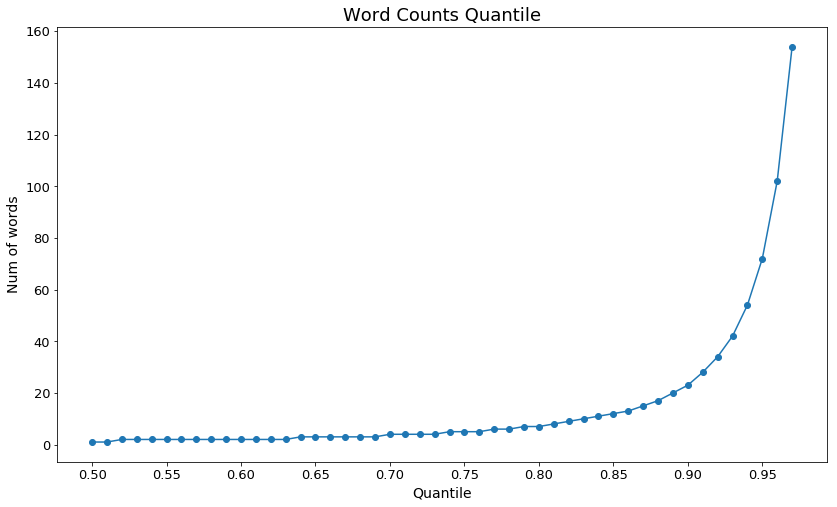

In [6]:
plt.figure(figsize=(13.8, 8))
# for i in ["GvAZL", "GvLAZ", "AZLvLAZ"]:
#     plt.plot(list(range(df.shape[0])), sorted(df[i]), label="{} ratio score".format(i))
plt.plot([i / 100 for i in range(50, 98, 1)], [np.quantile(bag_of_words["songcount"], i/100) for i in range(50, 98, 1)], 
         "-o")
plt.xlabel("Quantile", fontsize=14)
plt.ylabel("Num of words", fontsize=14)
plt.title("Word Counts Quantile", fontsize=18)
plt.tick_params(labelsize=13)
plt.xticks([i / 100 for i in range(50, 98, 5)])
plt.show()

In [7]:
def construct_existence_sparse_matrice(df, bag_of_words):
    words = bag_of_words["word"]
    sparse_matrice = [[] for i in range(df.shape[0])]
    for i in range(df.shape[0]):
        curr = dict(df.loc[i, "word_intersect_counter"])
        sparse_matrice[i] = [1 if w in curr else 0 for w in words]
        if i % 2000 == 0:
            print(i)
    return sparse_matrice

In [22]:
bag_of_words

0.338382948740532
0.31134401972872994


In [23]:
selected_bag_of_words = bag_of_words[bag_of_words["songcount"] >=70]
selected_bag_of_words.shape[0] / bag_of_words.shape[0]

0.051552162849872775

In [24]:
[selected_song_lyrics.shape[0], selected_bag_of_words.shape[0]]

[7070, 2026]

In [25]:
sparse_matrix = construct_existence_sparse_matrice(selected_song_lyrics, selected_bag_of_words)

0
2000
4000
6000


In [26]:
from sklearn.cluster import KMeans

In [34]:
def KMWordCluster(df, sparse_matrix, n_cluster):
    data = sparse_matrix
    labels = df[["name", "artist"]].values.tolist()
    word_cluster = KMeans(n_clusters=n_cluster, random_state=48, n_init=50).fit(data)
    pred_clusters = word_cluster.labels_
    print(Counter(pred_clusters))
    cluster_labels=[[] for i in range(n_cluster)]
    for i, j in enumerate(pred_clusters):
        cluster_labels[j].append(labels[i])
    return pred_clusters, cluster_labels

In [35]:
pred_clusters, cluster_labels = KMWordCluster(selected_song_lyrics, sparse_matrix, 20)

Counter({7: 801, 2: 733, 3: 684, 16: 625, 18: 572, 17: 560, 12: 560, 14: 488, 19: 466, 13: 394, 11: 315, 6: 297, 1: 220, 9: 218, 4: 77, 5: 52, 8: 4, 15: 2, 10: 1, 0: 1})


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [30]:
x_a = sparse_matrix
x_a = StandardScaler().fit_transform(x_a)

In [18]:
pca_a = PCA(n_components=2)
principalComponents_a = pca_a.fit_transform(x_a)
principalDf_a = pd.DataFrame(data = principalComponents_a
             , columns = ['principal component 1', 'principal component 2'])

(7070, 2)


'\nfig = plt.figure(figsize=(10,10))\nax0 = fig.add_subplot(111)\nax0.scatter(data_projected[:,0],data_projected[:,1])\n'

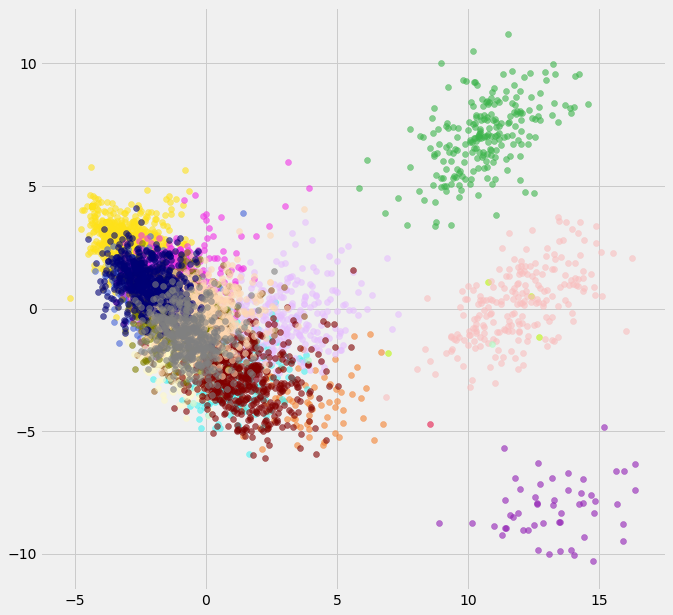

In [36]:
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train,y_train= sparse_matrix, pred_clusters

LDA = LinearDiscriminantAnalysis(n_components=2) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)
# PLot the transformed data

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for l,c in zip(np.unique(y_train),colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,alpha=0.6)
"""
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(data_projected[:,0],data_projected[:,1])
"""

In [118]:
top_50 = BB[BB["peak"] <= 50]
print(top_50.shape[0] / song_lyrics.shape[0])
selected_song_lyrics = top_50.merge(song_lyrics, left_on=["name", "artist"], right_on=["song", "artist"], how="left").dropna(subset=["word_intersect_counter"], axis=0).reset_index(drop=True)
print(selected_song_lyrics.shape[0] / song_lyrics.shape[0])


0.6660648229698785
0.5925224590452703


In [119]:
sparse_matrix2 = construct_existence_sparse_matrice(selected_song_lyrics, selected_bag_of_words)

0
2000
4000
6000
8000
10000
12000


In [120]:
pred_clusters2, cluster_labels2 = KMWordCluster(selected_song_lyrics, sparse_matrix2, 20)

Counter({4: 1353, 18: 1245, 15: 1142, 11: 1031, 7: 960, 1: 942, 2: 852, 19: 804, 10: 734, 13: 713, 12: 685, 6: 659, 17: 538, 9: 487, 3: 465, 8: 446, 14: 244, 16: 135, 0: 11, 5: 9})


(13455, 2)


'\nfig = plt.figure(figsize=(10,10))\nax0 = fig.add_subplot(111)\nax0.scatter(data_projected[:,0],data_projected[:,1])\n'

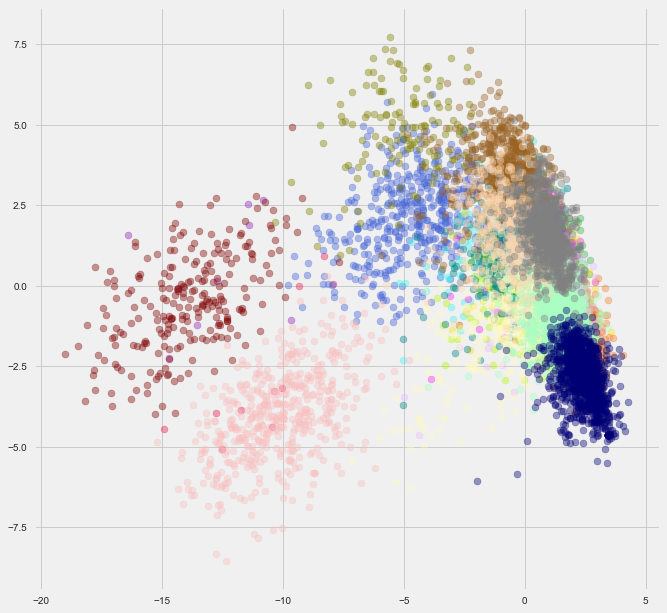

In [121]:
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train,y_train= sparse_matrix2, pred_clusters2

LDA = LinearDiscriminantAnalysis(n_components=2) # The n_components key word gives us the projection to the n most discriminative directions in the dataset. We set this parameter to two to get a transformation in two dimensional space.  
data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)
# PLot the transformed data

colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for l,c in zip(np.unique(y_train),colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,alpha=0.4)
"""
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.scatter(data_projected[:,0],data_projected[:,1])
"""

In [123]:
selected_bag_of_words["word"].values.tolist()

['beat',
 'shoulder',
 'switch',
 'gypsy',
 'front',
 'empty',
 'slang',
 'steel',
 'sweetheart',
 'agree',
 'sale',
 'enough',
 'eat',
 'scratch',
 'ghetto',
 'lick',
 'erase',
 'nearly',
 'away',
 'la',
 'jump',
 'trace',
 'brand',
 'excite',
 'wall',
 'nothin',
 'star',
 'mix',
 'sight',
 'crook',
 'danger',
 'taste',
 'house',
 'leave',
 'third',
 'doo',
 'patience',
 'king',
 'hole',
 'te',
 'platinum',
 'fat',
 'hardest',
 'suit',
 'surely',
 'court',
 'car',
 'add',
 'settle',
 'innocent',
 'superstar',
 'attitude',
 'bro',
 'ohh',
 "it'd",
 'easily',
 'papa',
 'prize',
 'cheek',
 'cup',
 'dot',
 'faster',
 'vega',
 'instead',
 'hit',
 'babe',
 'bentley',
 'dawg',
 'whip',
 'pole',
 'hook',
 'dime',
 'upon',
 'morn',
 'thrill',
 'smack',
 'mad',
 'boat',
 "she'll",
 'take',
 'speak',
 'lake',
 'relationship',
 'loser',
 'appeal',
 'cling',
 'shoulda',
 'sting',
 'flo',
 'message',
 'hustler',
 'gold',
 'mission',
 'use',
 'sue',
 'spill',
 'affection',
 'america',
 'nation',
 'm